# Schrödinger-Equation (in wave and phase form)

In [1]:
%run src/sps_test_suite.py

# cosmo 2D

## phase-ho-upwind

t = 0.0000000 dt = 0.0031789 a = 1.0000000 
t = 0.0031789 dt = 0.0031789 a = 1.0000000 
t = 0.0063578 dt = 0.0031789 a = 1.0000000 
t = 0.0095367 dt = 0.0031789 a = 1.0000000 
t = 0.0127157 dt = 0.0031789 a = 1.0000000 
t = 0.0158946 dt = 0.0031789 a = 1.0000000 
t = 0.0190735 dt = 0.0031789 a = 1.0000000 
t = 0.0222524 dt = 0.0031789 a = 1.0000000 
t = 0.0254313 dt = 0.0031789 a = 1.0000000 
t = 0.0286102 dt = 0.0031789 a = 1.0000000 
t = 0.0317891 dt = 0.0031789 a = 1.0000000 
t = 0.0349681 dt = 0.0031789 a = 1.0000000 
t = 0.0381470 dt = 0.0031789 a = 1.0000000 
t = 0.0413259 dt = 0.0031789 a = 1.0000000 
t = 0.0445048 dt = 0.0031789 a = 1.0000000 
t = 0.0476837 dt = 0.0031789 a = 1.0000000 
t = 0.0508626 dt = 0.0031789 a = 1.0000000 
t = 0.0540415 dt = 0.0031789 a = 1.0000000 
t = 0.0572205 dt = 0.0031789 a = 1.0000000 
t = 0.0603994 dt = 0.0031789 a = 1.0000000 
t = 0.0635783 dt = 0.0031789 a = 1.0000000 
t = 0.0667572 dt = 0.0031789 a = 1.0000000 
t = 0.0699361 dt = 0.0031789 a =

/home/xerox/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


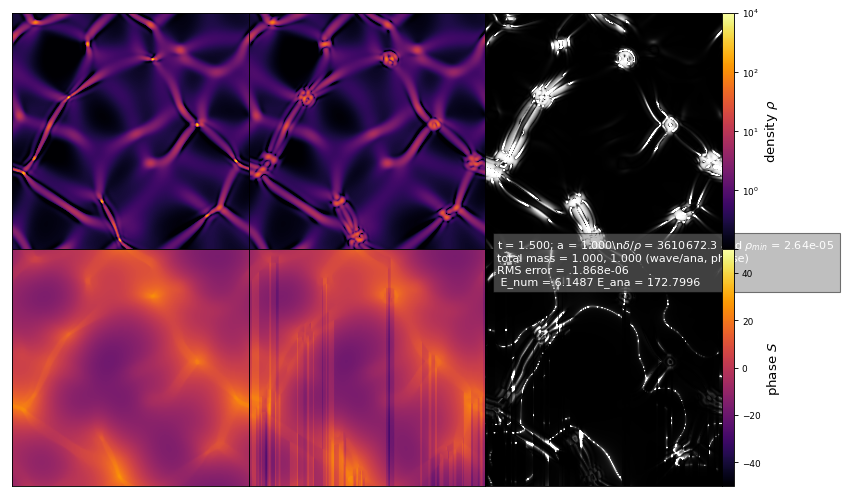

In [127]:
def extraConfig(c):
    c["nThreads"] = 1
    c["resolution"] = 256
    #c["phaseYlim"] = [-100, 100]
    c["dpi"] = 80
    c["fps"] = 1
    c["slowDown"] = 10
    c["tEnd"] = 1.5
    c["outputTimestep"] = True
    c["stencilOrder"] = 2
    c["timeOrder"] = 4
    c["C_parabolic"] = 1/6 * 2
    c["C_velocity"] = 1
    c["plotDensityLogarithm"] = True
    c["densityYlim"] = [0, 1]
    c["gravity"] = 1
    c["domainSize"] = 25
    c["plotDebug"] = True

runTest(test_name="cosmo 2D", scheme_name="phase-ho-upwind", useWaveSolver = True, extraConfig=extraConfig)
#runTest(test_name="quasi-shock", scheme_name="phase-ho-upwind_albada")
#runTest(test_name="periodic gaussian wave packet", scheme_name="phase-ho-upwind_albada", createAnimation=True)
#runTest(test_name="wave packet collision", scheme_name="phase-ho-upwind_mc", createAnimation=True)#, useWaveSolver=True)

Ordnung - 3: .2041e-8

In [ ]:
Ordnung -4: .1992

In [162]:
L = 0.01

def test(xx, yy, dx, t, m, hbar):
    return tests.cosmological2D(xx, yy, dx, t, m, hbar, Lx=L, Ly=L, eps=5e-3, N=5)

#def test(xx, yy, dx, t, m, hbar):
#    return tests.periodicLi1(xx, dx, t, m, hbar, L = 1)

c = config.generateConfig()
c["dimension"] = 2
c["usePeriodicBC"] = True
c["nThreads"] = 1
c["resolution"] = 16
#c["phaseYlim"] = [-100, 100]
c["dpi"] = 80
c["fps"] = 1
c["slowDown"] = 10
c["tEnd"] = 1.5
c["outputTimestep"] = False
c["stencilOrder"] = 2
c["timeOrder"] = 3
c["C_velocity"] = 1
c["plotDensityLogarithm"] = True
c["densityYlim"] = [0, .75]
c["plotPhaseMod2"] = False
c["phaseYlim"] = [-5, 5]
c["gravity"] = 40
c["domainSize"] = L
c["useAdaptiveTimestep"] = True

c["savePlots"] = True

#timeorders = [1, 2, 3, 4]
#for te in timeorders:
#    c["timeOrder"] = te
tEnd = 0.0001
cfls = np.linspace(0.01, 1, 20)
timeorders = [1, 2, 3, 4]
c["tEnd"] = tEnd
for timeorder in timeorders:
    c["timeOrder"] = timeorder 
    errors = []
    for cfl in cfls:
        c["C_parabolic"] = cfl 
        solver = phase_schemes.HOUpwindScheme(c, test)
        wsolver = wave_schemes.SpectralScheme(c, test)

        solver.run()
        wsolver.run()
        d1 = solver.getDensity()
        d2 = wsolver.getDensity()
        errors.append(np.sum(np.abs(d1 - d2))/c["resolution"]**2)

        
        #animation.drawFrame(solver, waveSolver=wsolver, filename=f"{timeorder}th_order_cfl={cfl}")
        #plt.show()

    np.savez(f"long_resolution={solver.dx}_{timeorder}th_order.npz", cfls = cfls, errors = errors)

Finished in 25600 time steps
Finished in 25600 time steps
Finished in 4123 time steps
Finished in 4123 time steps
Finished in 2242 time steps
Finished in 2242 time steps
Finished in 1612 time steps
Finished in 1540 time steps
Finished in 1584 time steps
Finished in 1173 time steps
Finished in 1579 time steps
Finished in 947 time steps
Finished in 4670 time steps
Finished in 794 time steps
Finished in 1590 time steps
Finished in 684 time steps
Finished in 1583 time steps
Finished in 600 time steps
Finished in 1588 time steps
Finished in 535 time steps
Finished in 1587 time steps
Finished in 483 time steps
Finished in 1584 time steps
Finished in 439 time steps
Finished in 1586 time steps
Finished in 403 time steps
Finished in 1572 time steps
Finished in 373 time steps
Finished in 1579 time steps
Finished in 347 time steps
Finished in 1570 time steps
Finished in 324 time steps
Finished in 1579 time steps
Finished in 304 time steps
Finished in 1585 time steps
Finished in 286 time steps
Fin

In [149]:

    np.savez(f"resolution={solver.dx}_{timeorder}th_order.npz", cfls = cfls, errors = errors)

    

In [148]:
cfls = cfls[:len(errors)]

In [ ]:
data = np.load("resolution=0.00125_4th_order.npz")

cfls 

[]

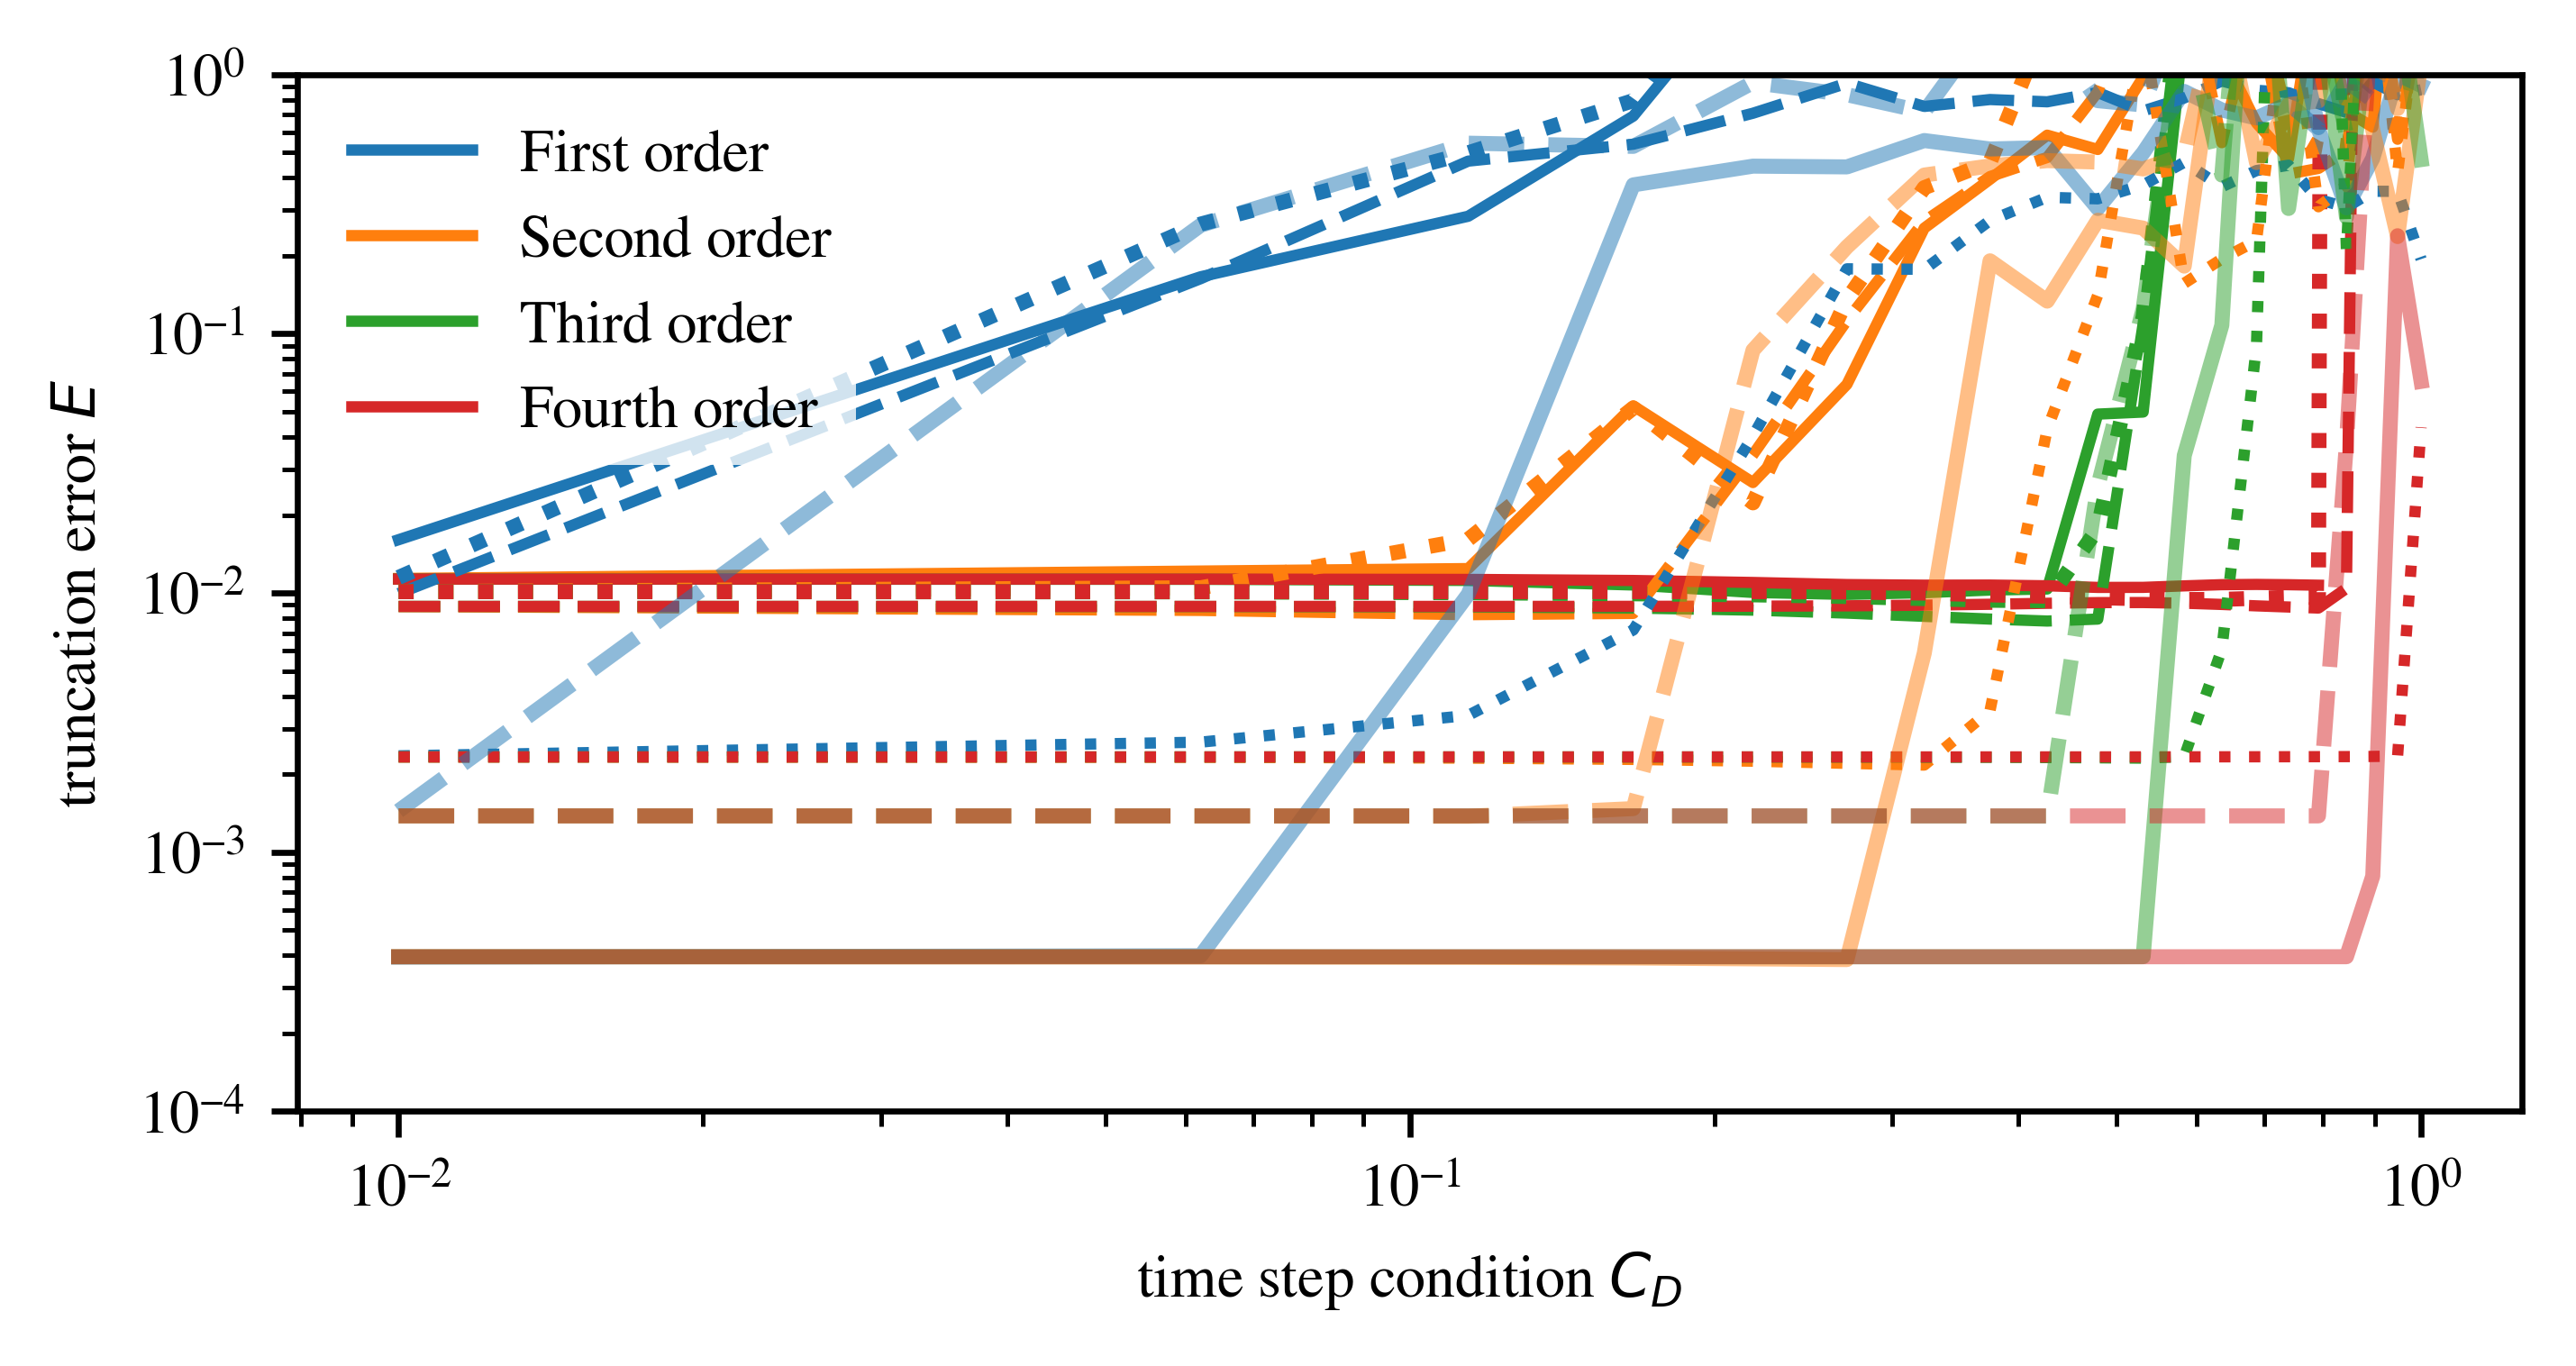

In [18]:
plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 8
plt.figure(figsize=(1.5*3.54, 2.54), dpi = 600)

filenames = [
    "resolution=0.00125_1th_order.npz",
    "resolution=0.00125_2th_order.npz",
    "resolution=0.00125_3th_order.npz",
    "resolution=0.00125_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"{i} 0.00125", c = f"C{i}")


filenames = [
    "resolution=0.000625_1th_order.npz",
    "resolution=0.000625_2th_order.npz",
    "resolution=0.000625_3th_order.npz",
    "resolution=0.000625_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"{i} 0.000625", c = f"C{i}", ls = "dashed")

filenames = [
    "long_resolution=0.000625_1th_order.npz",
    "long_resolution=0.000625_2th_order.npz",
    "long_resolution=0.000625_3th_order.npz",
    "long_resolution=0.000625_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"long {i} 0.000625", c = f"C{i}", lw = 2, ls = "dotted")

filenames = [
    "resolution=0.0003125_1th_order.npz",
    "resolution=0.0003125_2th_order.npz",
    "resolution=0.0003125_3th_order.npz",
    "resolution=0.0003125_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"{i} 0.0003125", c = f"C{i}", ls = "dotted")


filenames = [
    "resolution=0.00015625_1th_order.npz",
    "resolution=0.00015625_2th_order.npz",
    "resolution=0.00015625_3th_order.npz",
    "resolution=0.00015625_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"{i} 0.00015625", c = f"C{i}", lw = 2, alpha = 0.5)


filenames = [
    "long_resolution=0.00015625_1th_order.npz",
    "long_resolution=0.00015625_2th_order.npz",
    "long_resolution=0.00015625_3th_order.npz",
    "long_resolution=0.00015625_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"long {i} 0.00015625", c = f"C{i}", ls="dashed", lw = 2, alpha = 0.5)


import matplotlib.lines as mlines

plots = []
labels = ["First order", "Second order", "Third order", "Fourth order"]
for i, label in enumerate(labels):
    p = mlines.Line2D([0], [0], c = f"C{i}", label=label)
    plots.append(p)

plt.ylim([1e-4, 1])
plt.ylabel("truncation error $E$")
plt.xlabel("time step condition $C_D$")
leg = plt.legend(handles = plots)
leg.get_frame().set_linewidth(0.0)
plt.savefig("../cfl_stability.pdf", bbox_inches="tight")
plt.plot()

# Res = 128

In [81]:
1/(1000**0.25)

0.17782794100389226

In [137]:
len(errors)

18

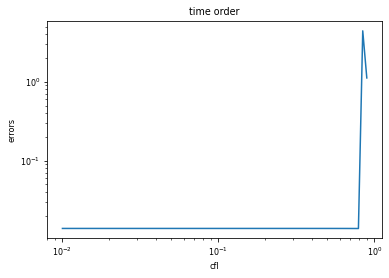

In [140]:
import matplotlib.pyplot as plt 

plt.title("time order")
plt.xlabel("cfl")
plt.ylabel("errors")
plt.loglog(cfls[:18], errors)

# Res = 64

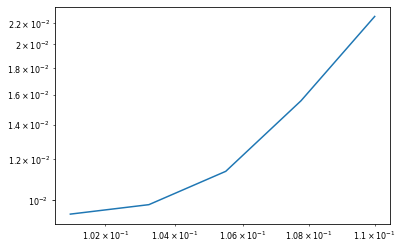

In [71]:
import matplotlib.pyplot as plt 

plt.loglog(cs, errors)

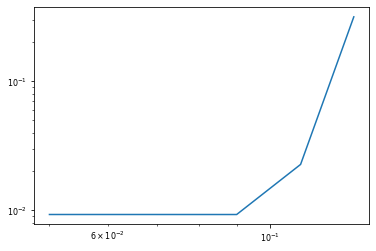

In [69]:
import matplotlib.pyplot as plt 

plt.loglog(cs, errors)

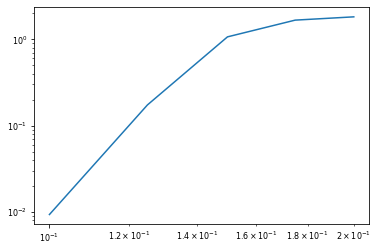

In [67]:
import matplotlib.pyplot as plt 

plt.loglog(cs, errors)

In [60]:
cs

array([0.05      , 0.05517241, 0.06034483, 0.06551724, 0.07068966,
       0.07586207, 0.08103448, 0.0862069 , 0.09137931, 0.09655172,
       0.10172414, 0.10689655, 0.11206897, 0.11724138, 0.12241379,
       0.12758621, 0.13275862, 0.13793103, 0.14310345, 0.14827586,
       0.15344828, 0.15862069, 0.1637931 , 0.16896552, 0.17413793,
       0.17931034, 0.18448276, 0.18965517, 0.19482759, 0.2       ])

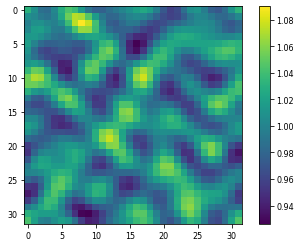

In [16]:
plt.imshow(solver.fields[0])
plt.colorbar()

In [49]:
1/6


0.16666666666666666